# Árboles de decisión

Vamos a analizar el funcionamiento de los [árboles de decisión](http://scikit-learn.org/stable/modules/tree.html) mediante ejemplos sencillos. Los contenidos son:

1. Árboles de clasificación sobre ejemplos sintéticos
2. Árboles de clasificación sobre ejemplo realista
3. Árboles de regresión

Primero cargamos librerías y funciones necesarias, incluyendo las del módulo `utils`:

In [1]:
from utils import plot_decision_boundary, CM_BRIGHT

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Árboles de clasificación sobre ejemplos sintéticos

Trabajaremos con los mismos ejemplos de los notebooks anteriores:

In [2]:
# ejemplo1
ejemplo1 = pd.read_csv("./data/ex2data1.txt", sep=",", header=None, names=['x1', 'x2','label'])

# ejemplo2
ejemplo2 = pd.read_csv("./data/ex2data2.txt", sep=",", header=None, names=['x1', 'x2','label'])

# ejemplo 3: Problema XOR 
np.random.seed(0)

# -- parameters
N     = 800
mu    = 1.5      # Cambia este valor
sigma = 1      # Cambia este valor

# variables auxiliares
unos = np.ones(int(N/4))
random4 = sigma*np.random.randn(int(N/4),1)
random2 = sigma*np.random.randn(int(N/2),1)

# -- features
y3 = np.concatenate([-1*unos,       unos,          unos,         -1*unos]) 
X1 = np.concatenate([-mu + random4, mu + random4, -mu + random4, mu + random4])
X2 = np.concatenate([+mu + random2,               -mu + random2])
X3 = np.hstack((X1,X2))

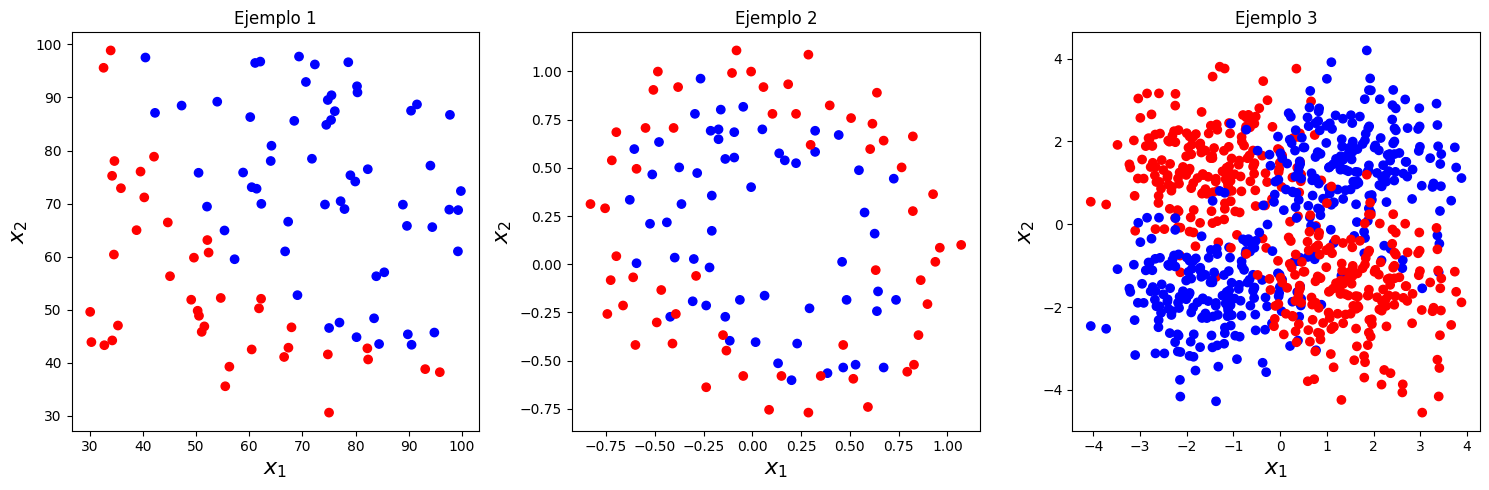

In [3]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(ejemplo1['x1'], ejemplo1['x2'], c=ejemplo1['label'], cmap=CM_BRIGHT)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.title('Ejemplo 1')

plt.subplot(1,3,2)
plt.scatter(ejemplo2['x1'], ejemplo2['x2'], c=ejemplo2['label'], cmap=CM_BRIGHT)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.title('Ejemplo 2')

plt.subplot(1,3,3)
plt.scatter(X3[:,0], X3[:,1], c=y3, cmap=CM_BRIGHT)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.title('Ejemplo 3')

plt.tight_layout()
plt.show()

Primero vamos a entrenar un árbol de decisión sobre el ejemplo 1.

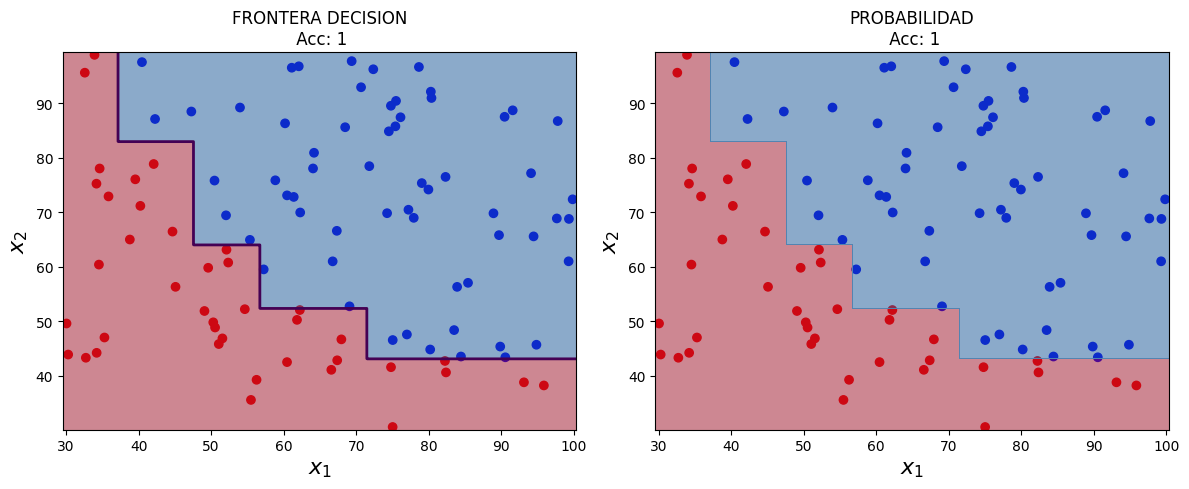

In [4]:
from sklearn.tree import DecisionTreeClassifier

# preparamos los datos
data1 = ejemplo1.values
X1 = data1[:, 0:2]
y1 = data1[:, -1]

# creamos el modelo y ajustamos
treeModel1 = DecisionTreeClassifier().fit(X1, y1)

plot_decision_boundary(X1, y1, treeModel1)

<div class = "alert alert-success">
EJERCICIO 4.1: Entrena un árbol de decisión sobre los ejemplos 2 y 3. Visualiza el resultado y coméntalo.
</div>

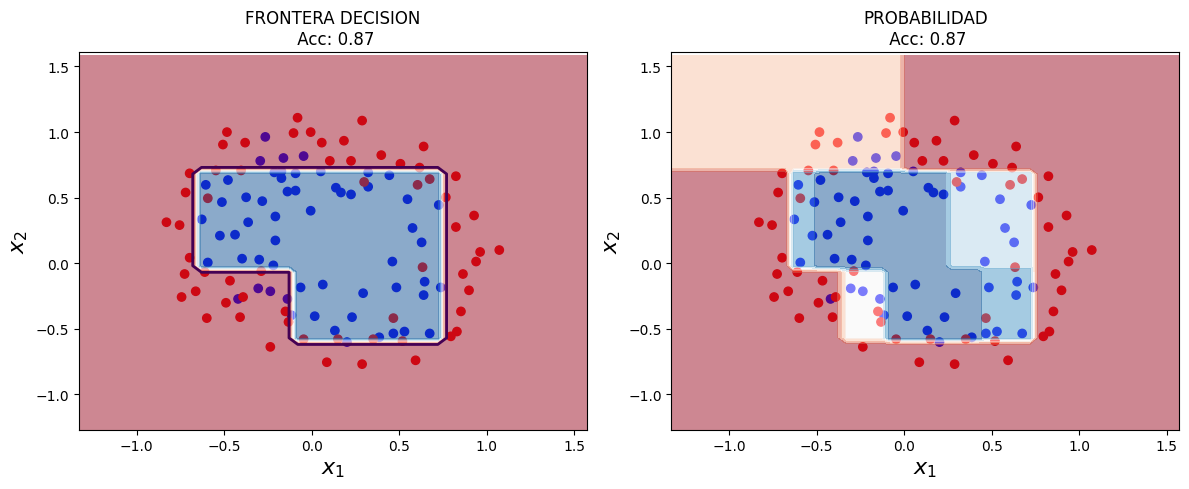

In [18]:
# ... código aquí para el ejemplo 2

data2 = ejemplo2.values
X2 = data2[:, 0:2]
y2 = data2[:, -1]

treeModel2 = DecisionTreeClassifier(min_samples_leaf=6).fit(X2, y2)

plot_decision_boundary(X2, y2, treeModel2)

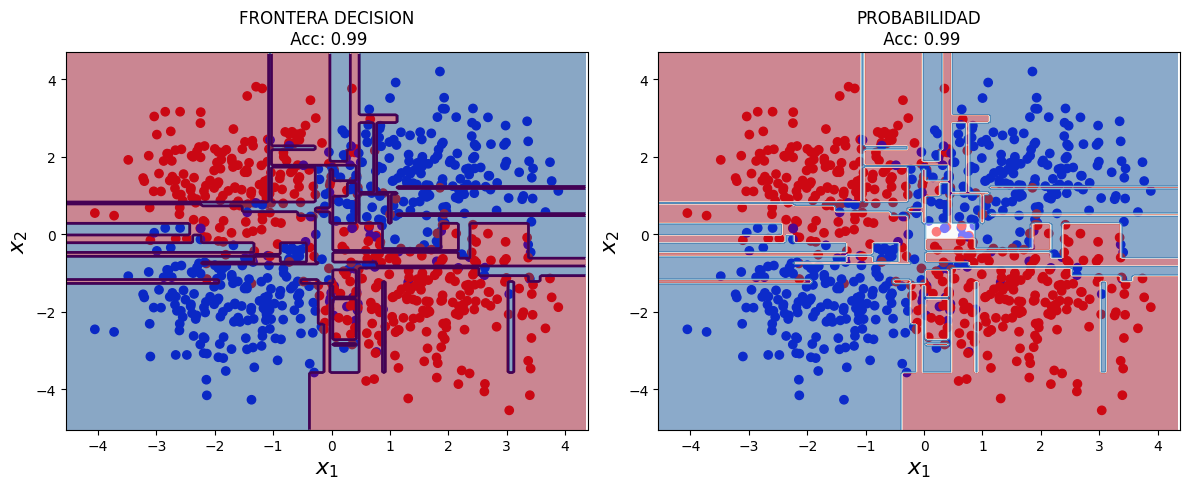

In [25]:
# ... código aquí para el ejemplo 3
treeModel3 = DecisionTreeClassifier(max_depth=13).fit(X3, y3)
plot_decision_boundary(X3, y3, treeModel3)

A la vista de los ejemplos anteriores, podemos comprobar varias cosas:

1) Seguramente estamos cometiendo overfitting, porque las fronteras de separación son altamente complejas, ¿cómo podemos controlar la complejidad de un árbol?

2) Las prestaciones las estamos midiendo sobre el conjunto de entrenamiento, por lo que no sabemos el alcance real que tienen estos algoritmos.

Vayamos por partes. Sobre 1)


Los árboles de decisión tienen varios parámetros para controlar la complejidad del mismo (véase la [documentación](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)). Normalmente, los parámetros más relevantes para controlar la complejidad son:

* **profundidad** del árbol (*max_depth*): Si utilizamos un árbol de profundidad 1, sólo podremos dividir el espacio en dos (una decisión). Si utilizamos un árbol de profundidad 2, dividiremos en 4 secciones, y así sucesivamente. Por tanto, con la profundidad controlamos la complejidad del árbol de decisión, y este parámetro sirve como herramienta para **regularizar* el algoritmo:

    - Un árbol de poca profundidad (poco complejo), tendrá menor riesgo de sufrir overfitting a costa de, potencialmente, incurrir en más error de clasificación.

    - Un árbol de mucha profundidad (muy complejo), tendrá mayor riesgo de sufrir overfitting a costa de, potencialmente, mejorar el error de clasificación.

* **Número mínimo de muestras en una hoja** (*min_samples_leaf*). Podemos forzar a que una hoja tenga un número mínimo de muestras en cada hoja, de tal forma que:
    - Un árbol con un *min_samples_leaf* elevado, tendrá complejidad menor que un árbol con *min_samples_leaf* pequeño.
    
<div class = "alert alert-success">
EJERCICIO 4.2: Varía los parámetros <b>max_depth</b> y <b>min_samples_leaf</b> (de forma independiente y después conjuntamente) y comprueba el resultado, ¿coincide con tu intuición?
</div>

<div class = "alert alert-success">
EJERCICIO 4.3: Calcule el valor óptimo de <b>max_depth</b> para el ejemplo 3, ¿cuáles son las prestaciones del algoritmo para este ejemplo?
</div>

Fitting 10 folds for each of 19 candidates, totalling 190 fits
best mean cross-validation score: 0.803
best parameters: {'max_depth': 13}


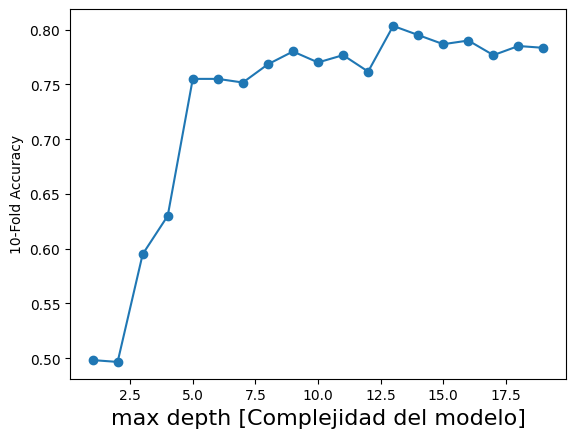

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# ... código aquí
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.25, random_state=2, stratify=y3)

max_depth_vector = list(range(1, 20))
param_grid = {'max_depth': max_depth_vector}
# ... código aquí
grid = GridSearchCV(DecisionTreeClassifier(), scoring="accuracy", param_grid=param_grid, cv=10, verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth_vector,scores,'-o')
plt.xlabel('max depth [Complejidad del modelo]',fontsize=16)
plt.ylabel('10-Fold Accuracy')
plt.show()

# 2. Árboles de clasificación sobre ejemplo realista

Vamos a trabajar sobre un **problema multiclase** de clasificación de frutas a partir de sus propiedades. También abordaremos la visualización de un árbol de decisión.

In [26]:
fruits = pd.read_table('./data/fruit_data_with_colors.txt')
print(fruits.shape)

fruits.head(10)

(59, 7)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [27]:
# esto se puede hacer con un label encoder
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [28]:
from sklearn.model_selection import train_test_split

# preparamos los datos
X = fruits[['height', 'width', 'mass', 'color_score']].values
y = fruits['fruit_label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print('Datos train: ', X_train.shape)
print('Datos test:  ', X_test.shape)

Datos train:  (47, 4)
Datos test:   (12, 4)


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# creamos el modelo y ajustamos
treeModel = DecisionTreeClassifier().fit(X_train, y_train)

y_test_predicted = treeModel.predict(X_test)
print(treeModel.score(X_test,y_test))

0.9166666666666666


Los valores óptimos de max_depth (por ejemplo) habría que sacarlos con validación cruzada. Este dataset es extremadamente pequeño, con lo cual vamos a probar validación cruzada con estrategia leave-one-out.

<div class = "alert alert-success">
EJERCICIO 4.4: Calcule el valor óptimo de <b>max_depth</b> con y sin estrategia leave-one-out
</div>

Fitting 3 folds for each of 19 candidates, totalling 57 fits
best mean cross-validation score: 0.875
best parameters: {'max_depth': 3}


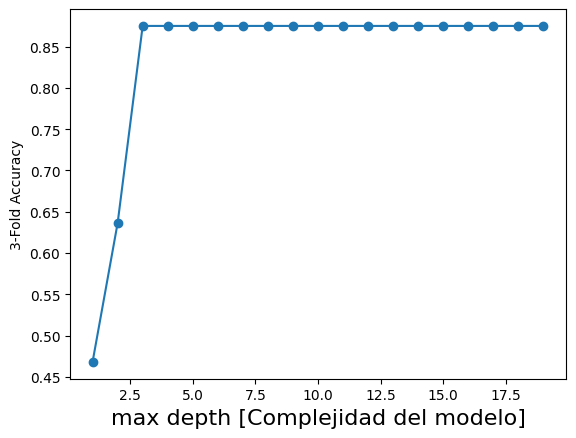

In [30]:
max_depth_vector = list(range(1, 20))
param_grid = {'max_depth': max_depth_vector}
# ... código aquí
grid = GridSearchCV(DecisionTreeClassifier(), scoring="accuracy", param_grid=param_grid, cv=3, verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth_vector,scores,'-o')
plt.xlabel('max depth [Complejidad del modelo]',fontsize=16)
plt.ylabel('3-Fold Accuracy')
plt.show()

Fitting 47 folds for each of 9 candidates, totalling 423 fits
best mean cross-validation score: 0.894
best parameters: {'max_depth': 8}


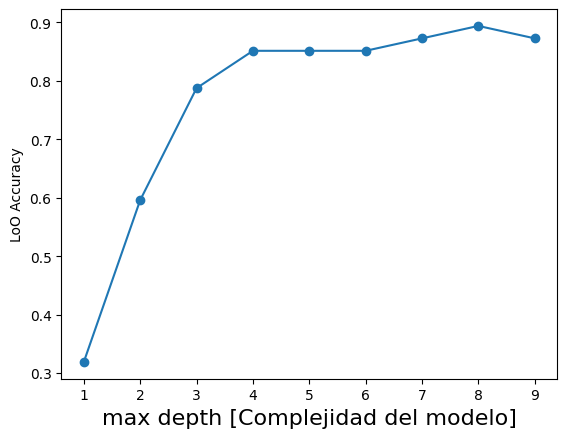

In [33]:
from sklearn.model_selection import LeaveOneOut

max_depth_vector = list(range(1, 10))
param_grid = {'max_depth': max_depth_vector }
# ... código aquí
grid = GridSearchCV(DecisionTreeClassifier(), scoring="accuracy", param_grid=param_grid, cv=LeaveOneOut(), verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth_vector,scores,'-o')
plt.xlabel('max depth [Complejidad del modelo]',fontsize=16)
plt.ylabel('LoO Accuracy')
plt.show()

### ¿Cómo visualizar un árbol?

Hay varias formas de representar un árbol. Se puede pintar una representación textual; algo similar al comando `tree` de Unix.

In [34]:
from sklearn import tree
text_representation = tree.export_text(treeModel)
print(text_representation)

|--- feature_1 <= 6.65
|   |--- feature_0 <= 6.10
|   |   |--- class: 2
|   |--- feature_0 >  6.10
|   |   |--- class: 4
|--- feature_1 >  6.65
|   |--- feature_3 <= 0.82
|   |   |--- feature_3 <= 0.74
|   |   |   |--- feature_0 <= 8.45
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  8.45
|   |   |   |   |--- class: 4
|   |   |--- feature_3 >  0.74
|   |   |   |--- class: 3
|   |--- feature_3 >  0.82
|   |   |--- class: 1



Pero es mucho más completo y potente e intuitivo representar el árbol como un árbol:

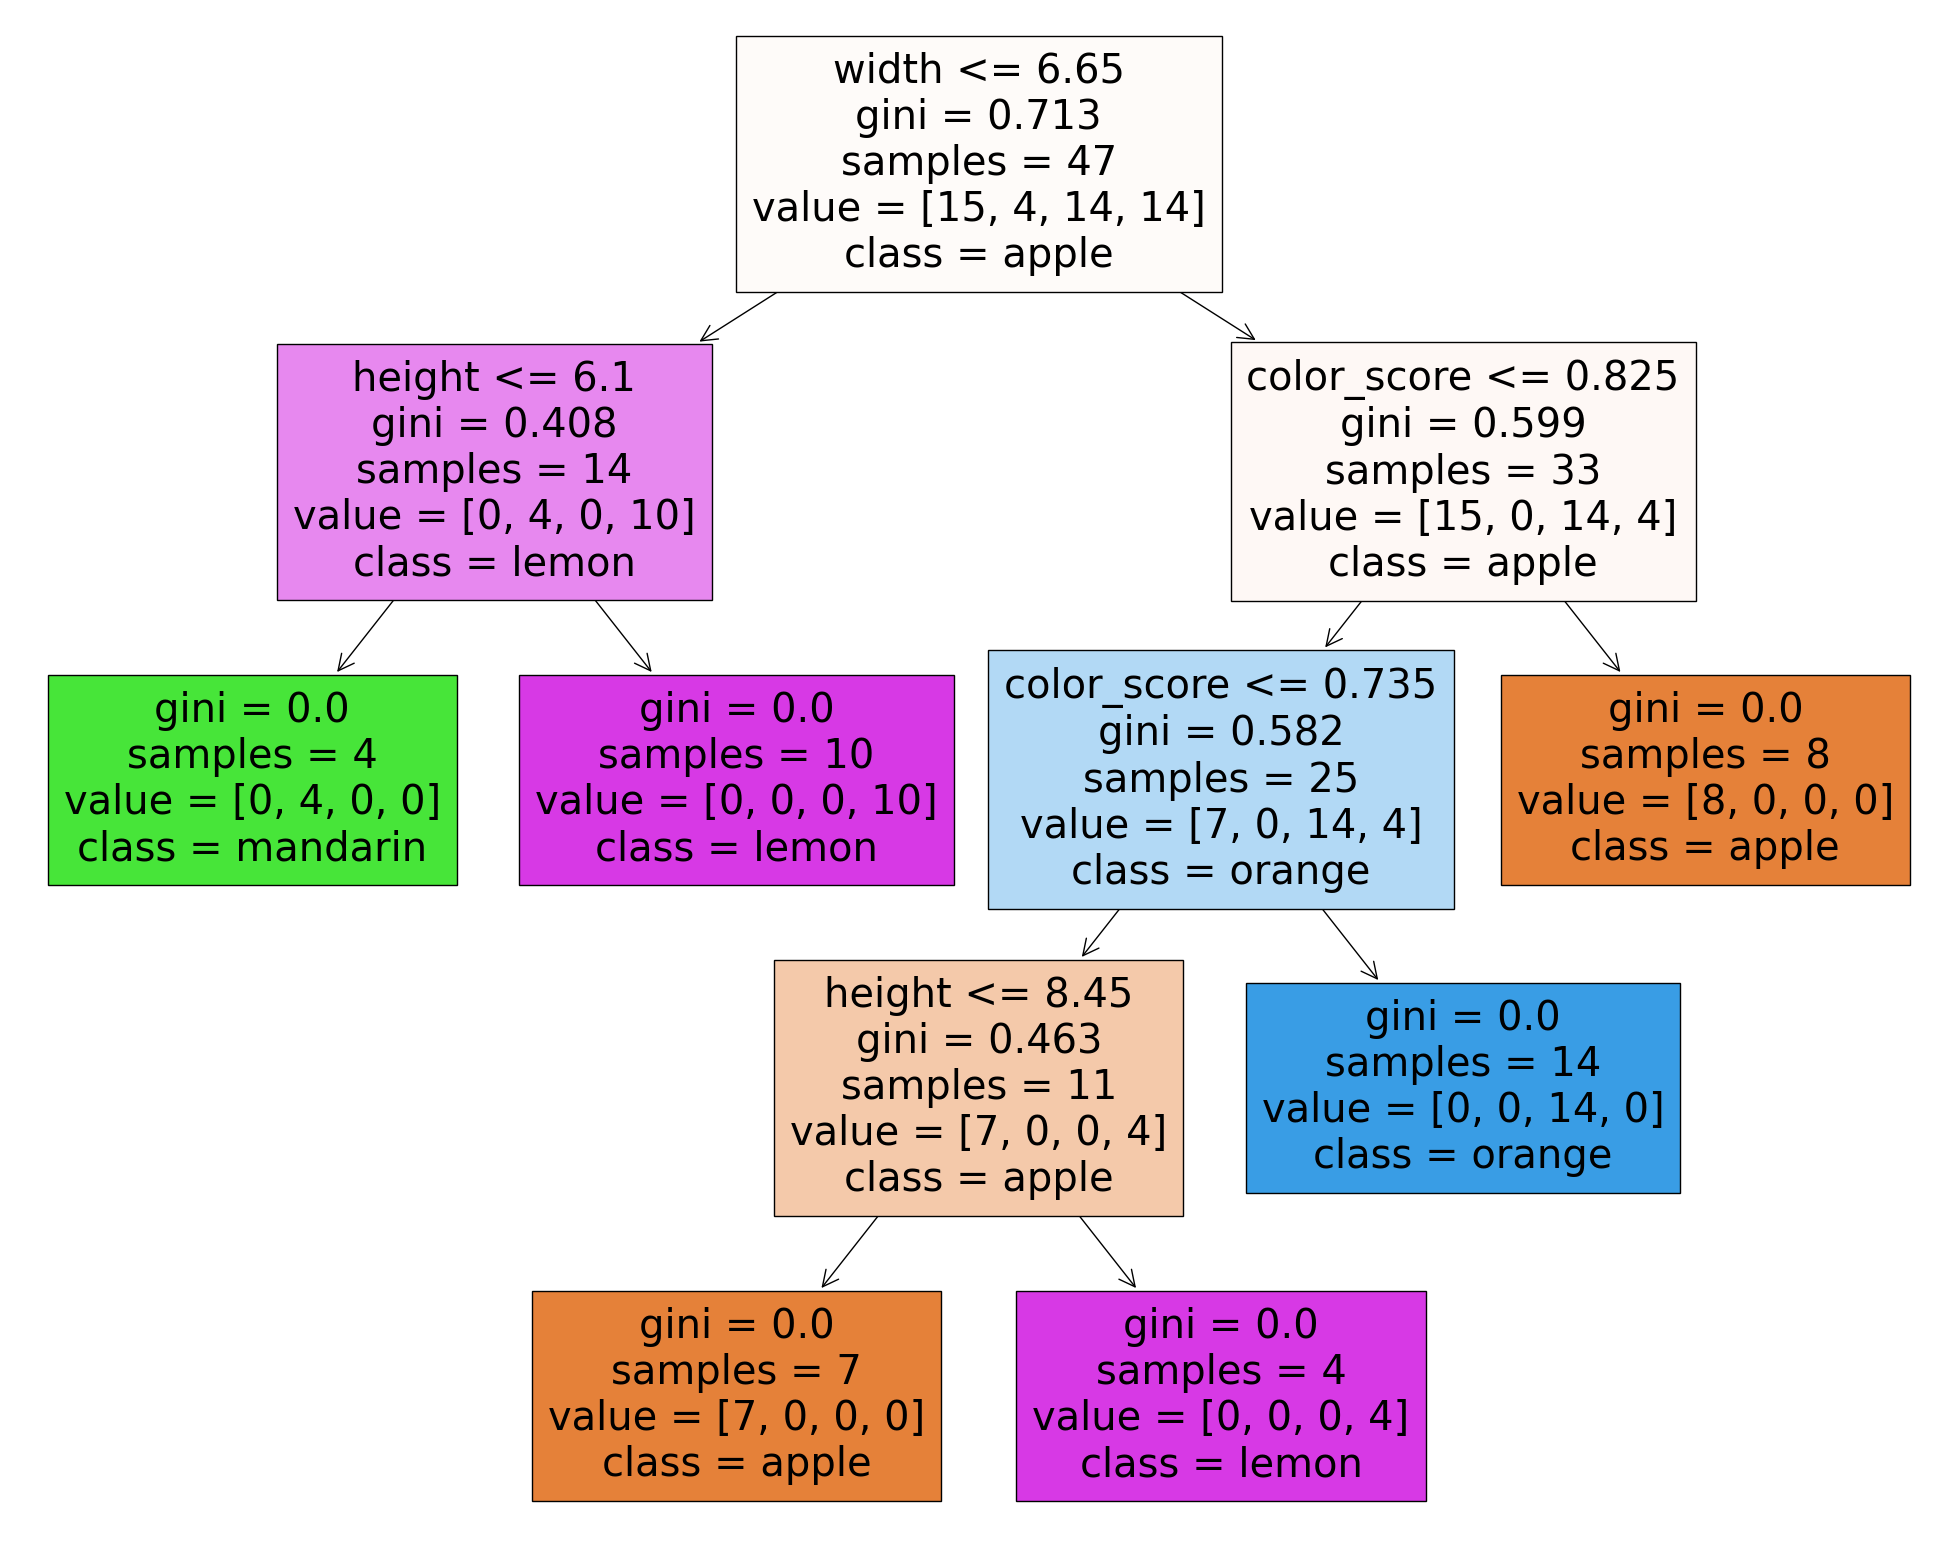

In [35]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treeModel, 
                   feature_names=['height', 'width', 'mass', 'color_score'],  
                    class_names=['apple','mandarin','orange','lemon'],
                   filled=True)

A la vista de la figura, observamos que:

1) Comenzamos con un Gini elevado ¿cuál es el máximo valor para este problema? y a medida que aumentamos la profundidad el valor Gini diminuye, hasta que en todas las hojas es 0.

2) Es un árbol de profundidad 4.

3) Todas las muestras de entrenamiento están bien clasificadas.

In [38]:
features = ['height', 'width', 'mass', 'color_score']
test_sample = 2

print('La muestra de test con etiqueta "{0}" y atributos: '.format(lookup_fruit_name[y_test[test_sample]]))
for i,f in enumerate(features):
    print(' ',f,':',X_test[test_sample,i])

print("ha sido clasificada como: '{0}' ".format(lookup_fruit_name[y_test_predicted[test_sample]]))

La muestra de test con etiqueta "lemon" y atributos: 
  height : 10.3
  width : 7.2
  mass : 194.0
  color_score : 0.7
ha sido clasificada como: 'lemon' 


<div class = "alert alert-success">
EJERCICIO 4.5: Para el ejemplo de la celda anterior, ¿puedes seguir el camino de la decisión?
</div>

# 3. Árboles de regresión

Vamos a aplicar árboles de regresión sobre nuestro ejemplo de regresión sintético:

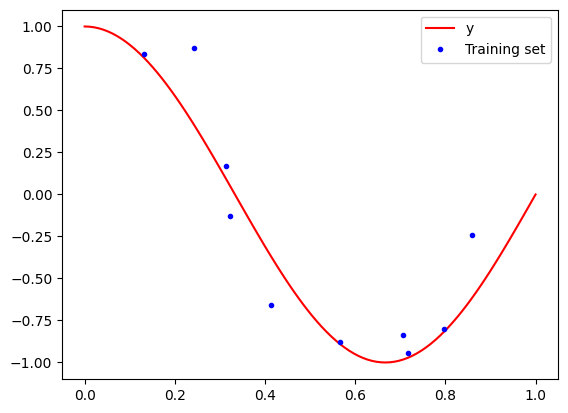

In [39]:
N_train = 10
N_test  = 100

# función verdadera g(x)
x = np.linspace(0,1,N_test)
g_x = np.cos(1.5*np.pi*x)

# proceso y
np.random.seed(0) # para asegurar reproducibilidad
epsilon = np.random.randn(N_test) * 0.2
y = g_x + epsilon

# Datos: D = {x_i,y_i}, obtenemos una muestra
idx = np.random.randint(0,N_test,N_train)
x_i = x[idx]
y_i = y[idx]

plt.plot(x,g_x,'r',label='y')
plt.plot(x_i,y_i,'b.',label='Training set')
plt.legend()
plt.show()

<div class = "alert alert-success">
EJERCICIO 4.6: Entrena un árbol de decisión sobre estos datos
</div>

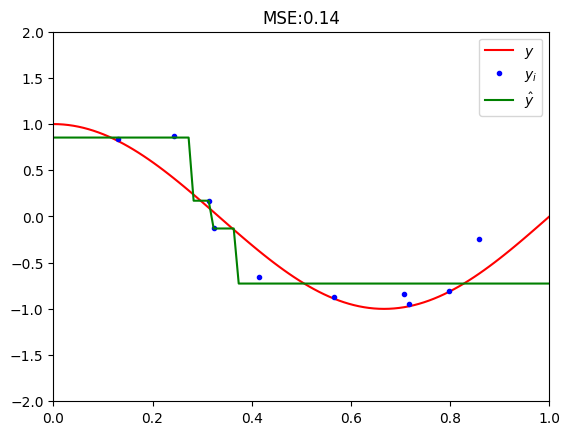

In [47]:
from sklearn.tree import DecisionTreeRegressor

X_train = x_i.reshape(-1, 1)
y_train = y_i
X_test  = x.reshape(-1, 1)

# ... código aquí
regTree = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)

y_hat = regTree.predict(X_test)

# error
error_test = np.mean(np.power(y - y_hat,2)) 


plt.plot(x,g_x,'r',label='$y$')
plt.plot(x_i,y_i,'b.',label='$y_i$')
plt.plot(x,y_hat,'g',label='$\hat{y}$')
plt.title('MSE:%.2f'%error_test)
plt.legend()
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.show()

<div class = "alert alert-success">
EJERCICIO 4.7: Modifica los valores de <b>max_depth</b> y observa el resultado, ¿concuerda con tu intuición?
</div>

<div class = "alert alert-success">
EJERCICIO 4.8: Representa el árbol entrenado
</div>

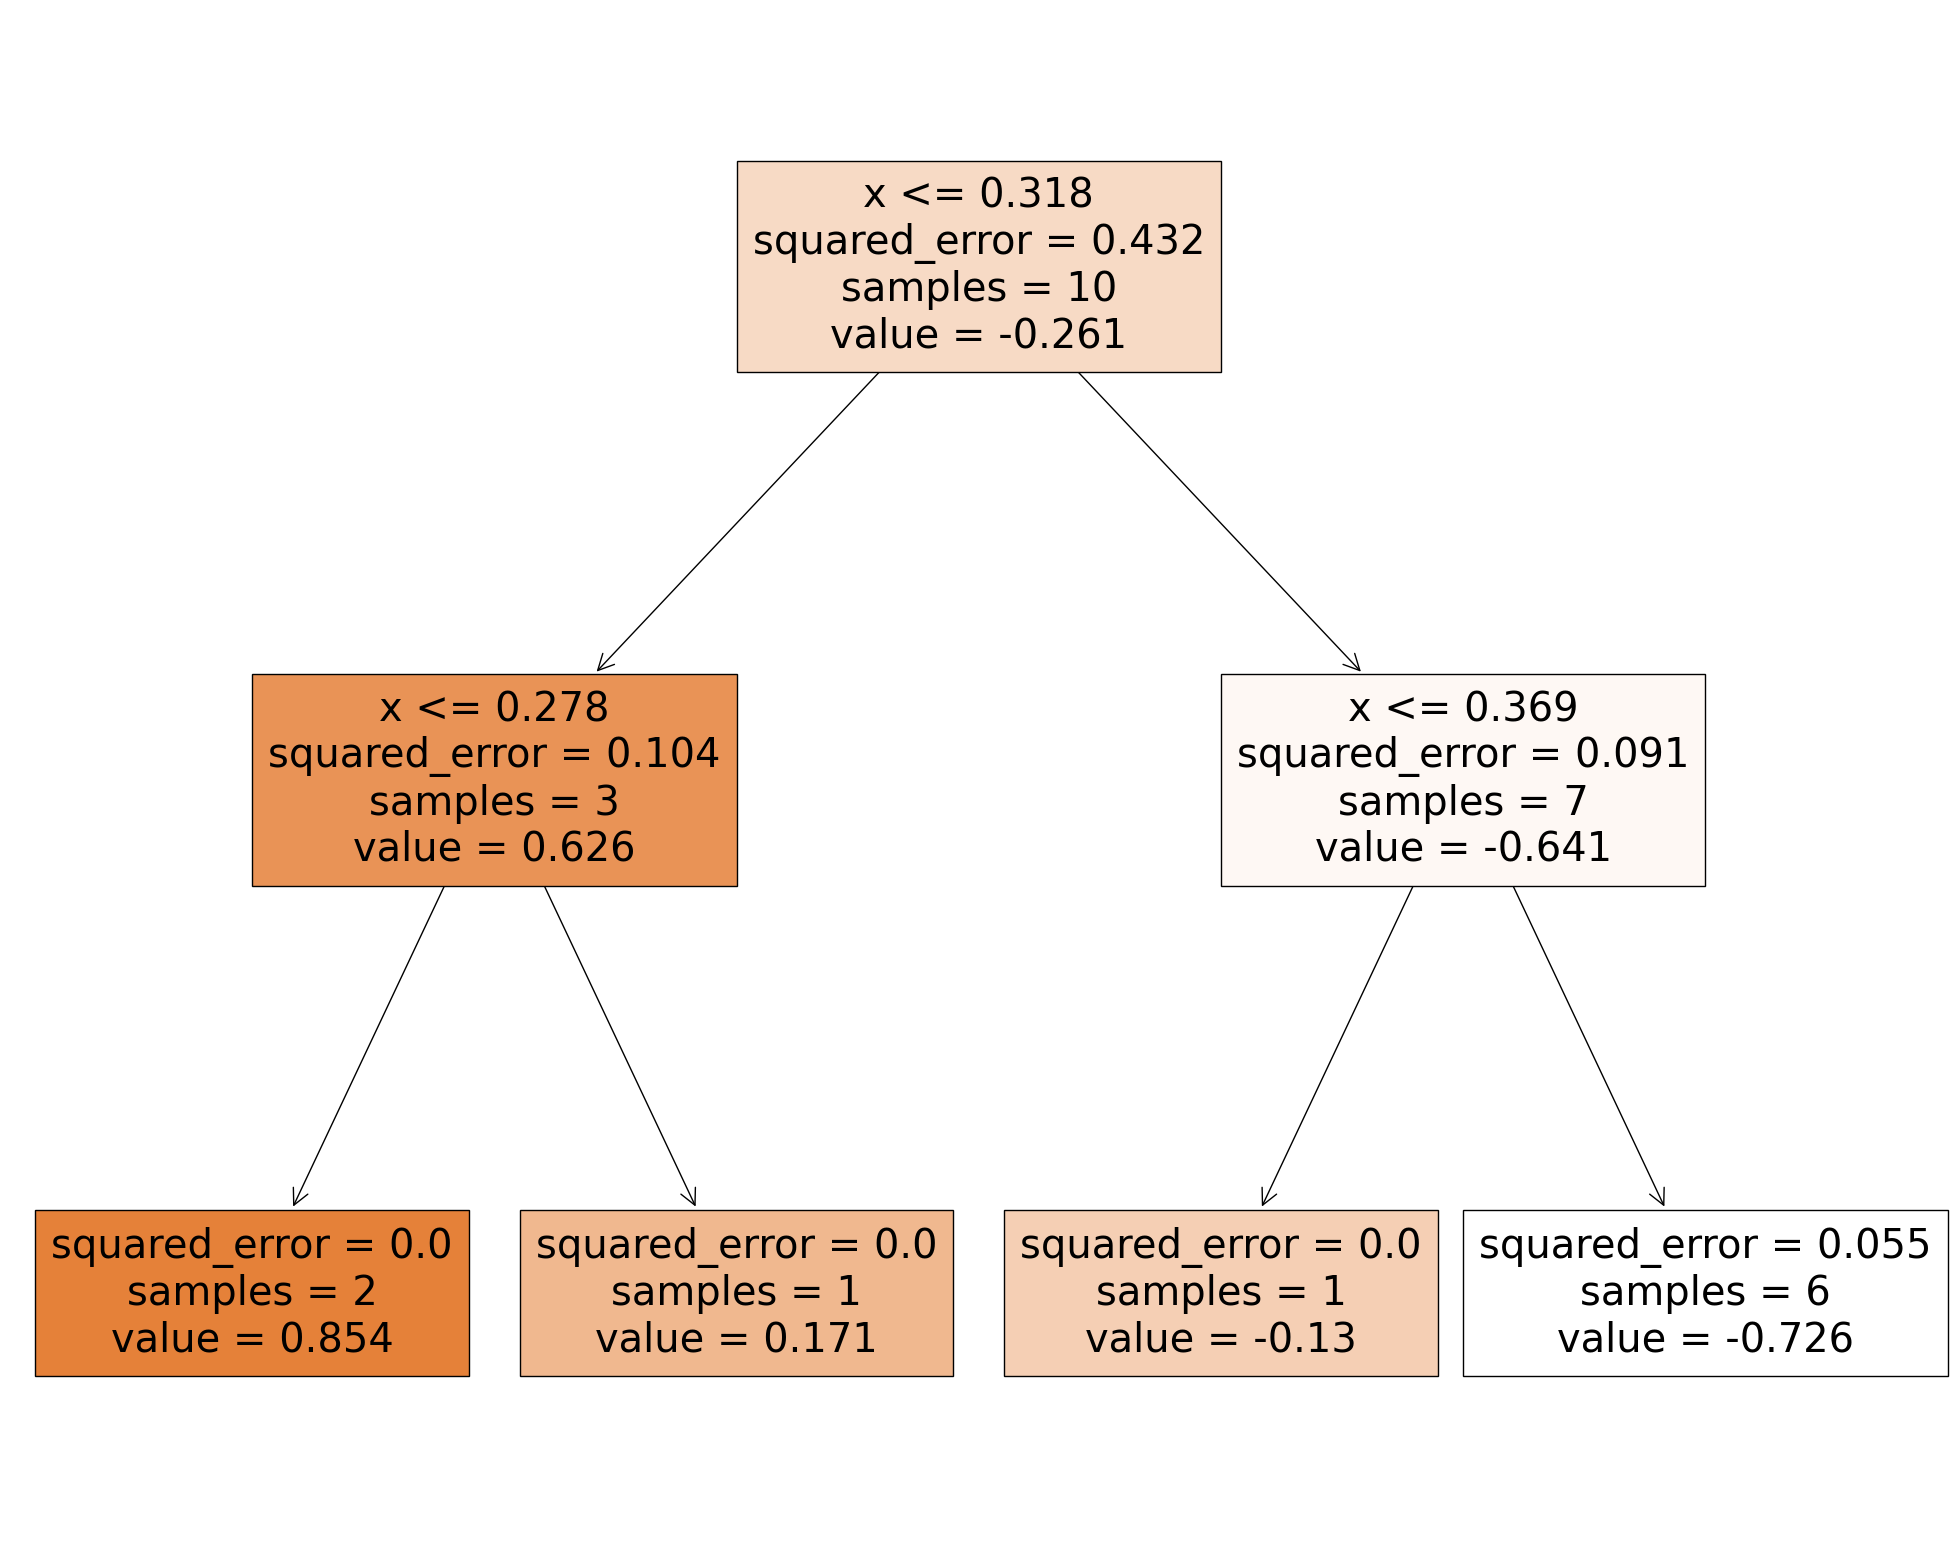

In [48]:
fig = plt.figure(figsize=(25,20))
# ... código aquí
_ = tree.plot_tree(regTree, filled=True, feature_names=["x"], )